In [1]:
import pandas as pd
import numpy as np
import matplotlib
import sns as sns

In [107]:
df = pd.read_csv("GeneralizationOnMaysData.csv")
print(df.head())

                               name  generalization_nodes  \
0  java.io.BufferedReader/Template1                   242   
1  java.io.BufferedReader/Template2                   139   
2  java.io.BufferedReader/Template3                   294   
3  java.io.BufferedReader/Template4                   239   
4            java.io.File/Template1                   144   

   generalization_edges  generalization_node_variables  \
0                   242                              0   
1                   139                             31   
2                   294                              1   
3                   239                              1   
4                   144                              5   

   generalization_edge_variables  g1_nodes  g1_edges  g2_nodes  g2_edges  time  
0                              0       242       111       242       111  1015  
1                             59       227       104       295       136  1415  
2                              1       29

In [47]:
df.describe()['time']

count      359.000000
mean      2158.161560
std       4765.884532
min          4.000000
25%        113.500000
50%        520.000000
75%       1934.500000
max      47692.000000
Name: time, dtype: float64

<Axes: ylabel='Density'>

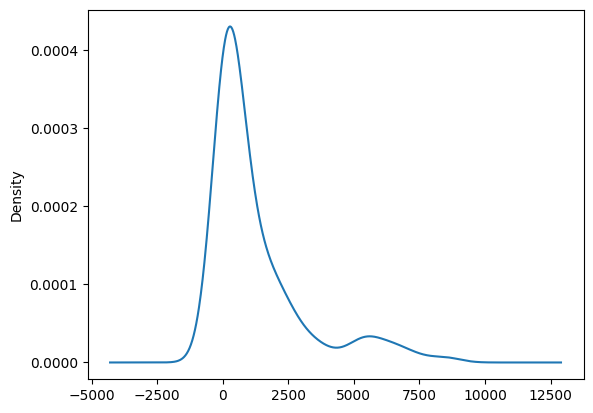

In [93]:
quantile = df['time'].quantile(0.95)
df[df['time'] < quantile]['time'].plot(kind='kde')

<Axes: ylabel='Frequency'>

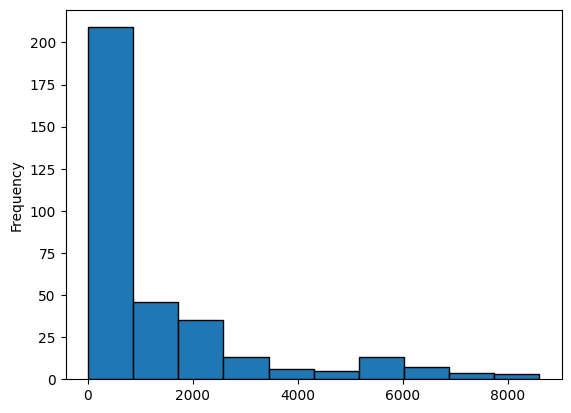

In [94]:
df[df['time'] < quantile]['time'].plot(kind='hist', edgecolor='black')

<Axes: ylabel='Frequency'>

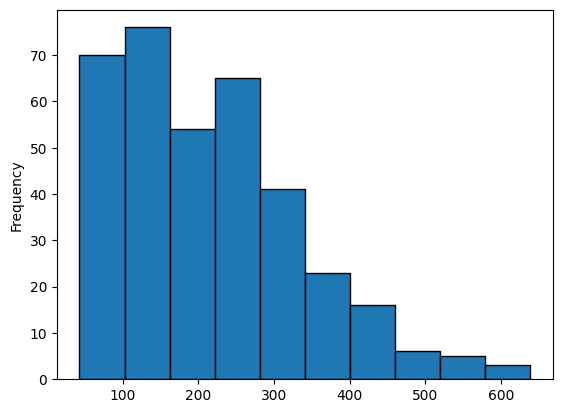

In [15]:
df['g1_nodes'].plot(kind='hist', edgecolor='black')

<Axes: xlabel='generalization_nodes', ylabel='time'>

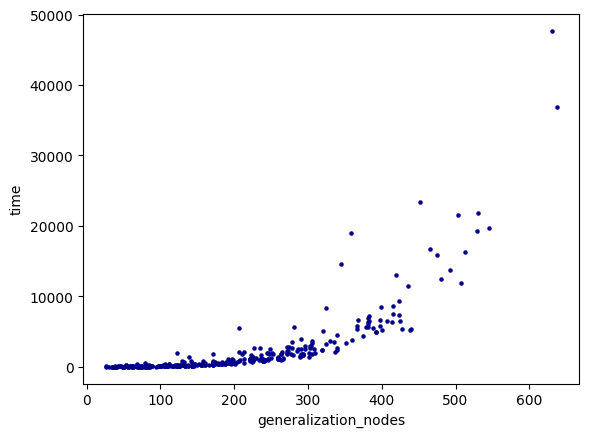

In [96]:
df.plot.scatter(x='generalization_nodes', y='time', c='DarkBlue', s=5)

<Axes: xlabel='generalization nodes', ylabel='time (ms)'>

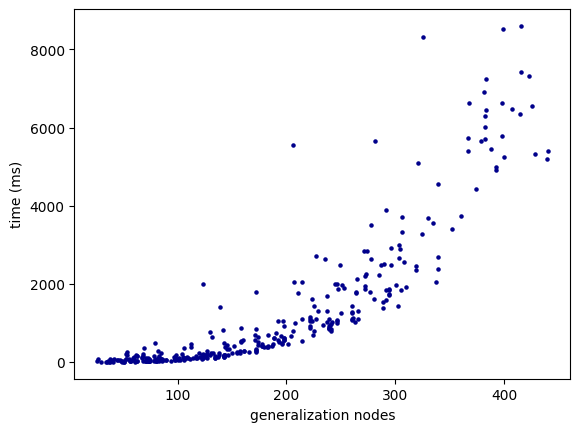

In [95]:
df[df['time'] < quantile].plot.scatter(x='generalization_nodes', y='time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='generalization nodes')

<Axes: xlabel='generalization_edges', ylabel='time'>

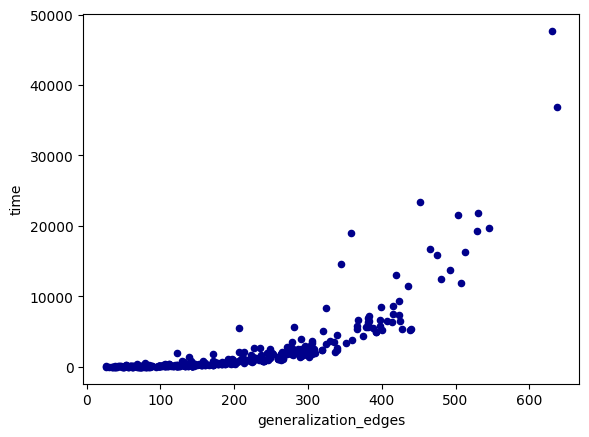

In [20]:
df.plot.scatter(x='generalization_edges', y='time', c='DarkBlue')

<Axes: xlabel='generalization_node_variables', ylabel='time'>

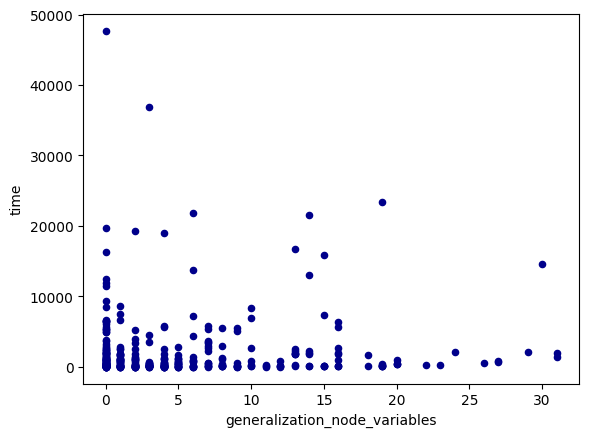

In [21]:
df.plot.scatter(x='generalization_node_variables', y='time', c='DarkBlue')

<Axes: xlabel='generalization_edge_variables', ylabel='time'>

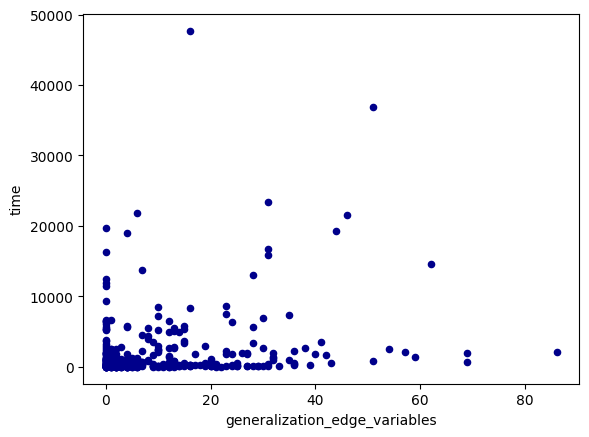

In [22]:
df.plot.scatter(x='generalization_edge_variables', y='time', c='DarkBlue')

<Axes: xlabel='g1_nodes', ylabel='time'>

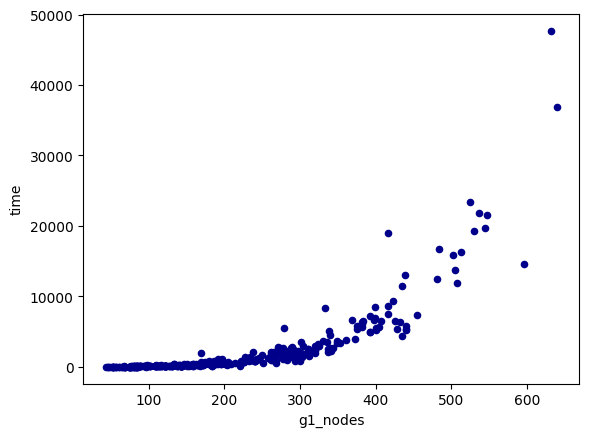

In [23]:
df.plot.scatter(x='g1_nodes', y='time', c='DarkBlue')

<Axes: xlabel='g2_nodes', ylabel='time'>

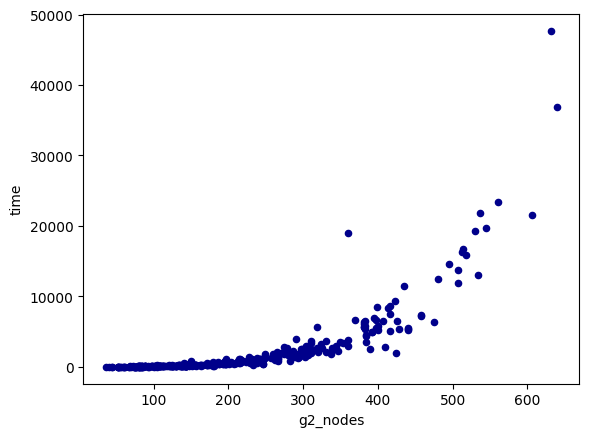

In [24]:
df.plot.scatter(x='g2_nodes', y='time', c='DarkBlue')

In [2]:
def add_more_info(df):
    df['nodes'] = df['g1_nodes'] + df['g2_nodes']
    df['edges'] = df['g1_edges'] + df['g2_edges']
    df['nodes^2'] = df['g1_nodes'] * df['g2_nodes']
    df['edges^2'] = df['g1_edges'] * df['g2_edges']
    df['nodesXedges'] = df['edges'] * df['nodes']

<Axes: xlabel='nodes', ylabel='time'>

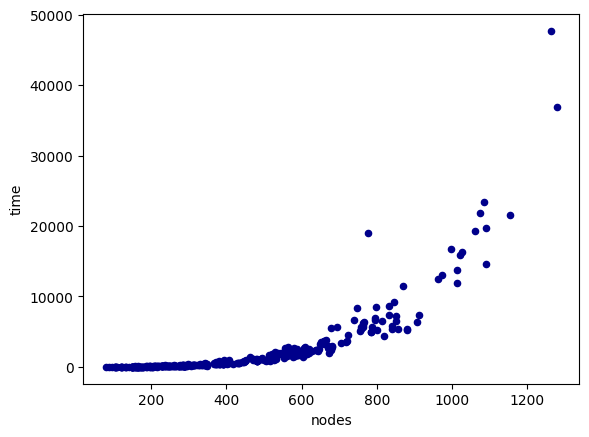

In [26]:
df.plot.scatter(x='nodes', y='time', c='DarkBlue')

<Axes: xlabel='edges', ylabel='time'>

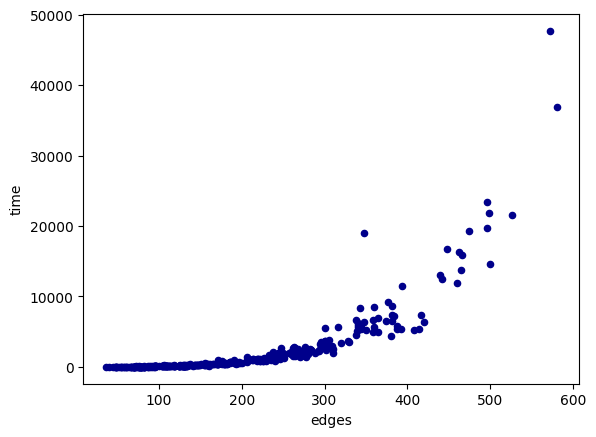

In [27]:
df.plot.scatter(x='edges', y='time', c='DarkBlue')

<Axes: xlabel='nodes^2', ylabel='time'>

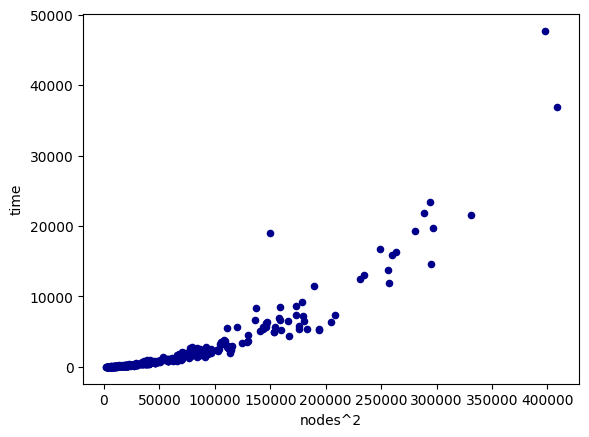

In [29]:
df.plot.scatter(x='nodes^2', y='time', c='DarkBlue')

<Axes: xlabel='edges^2', ylabel='time'>

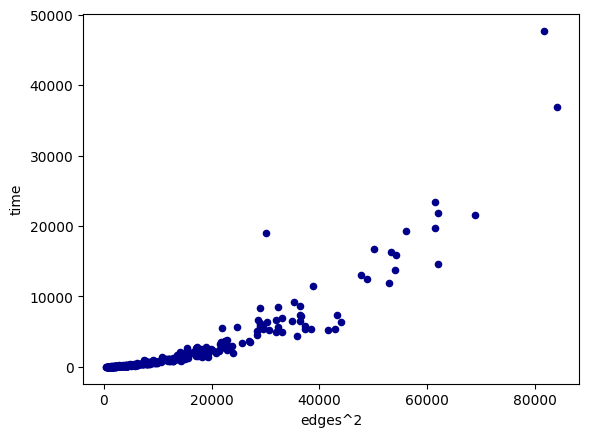

In [30]:
df.plot.scatter(x='edges^2', y='time', c='DarkBlue')

<Axes: xlabel='nodesXedges', ylabel='time'>

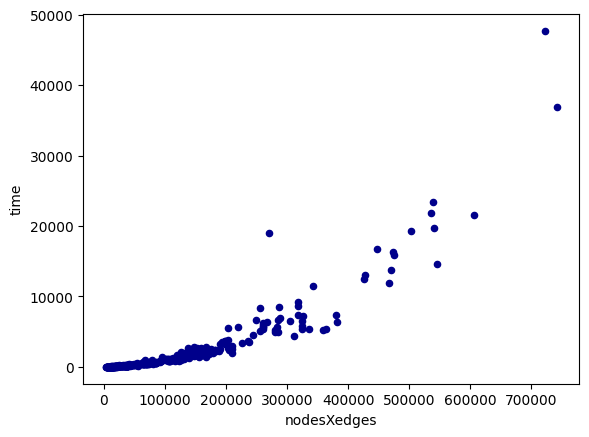

In [31]:
df.plot.scatter(x='nodesXedges', y='time', c='DarkBlue')

In [34]:
df2 = pd.read_csv("AUASTOnMaysData.csv")
print(df2.head())

                               name  time
0  java.io.BufferedReader/Template1   684
1  java.io.BufferedReader/Template2   721
2  java.io.BufferedReader/Template3   789
3  java.io.BufferedReader/Template4   820
4           java.io.File/Template10  1111


<Axes: ylabel='Frequency'>

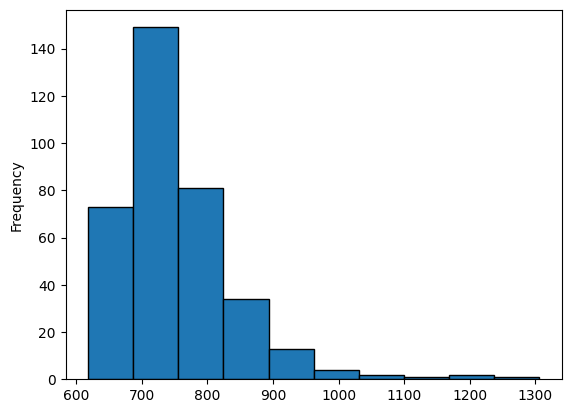

In [35]:
df2['time'].plot(kind='hist', edgecolor='black')

<Axes: ylabel='Frequency'>

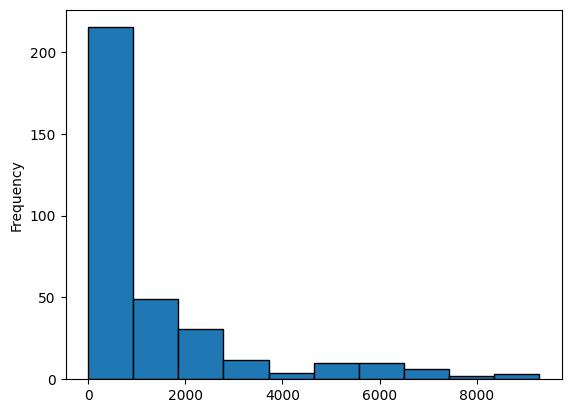

In [37]:
df[df['time'] < 10000]['time'].plot(kind='hist', edgecolor='black')

In [39]:
merged = pd.merge(df, df2, on='name', how='inner')
merged

,name,generalization_nodes,generalization_edges,generalization_node_variables,generalization_edge_variables,g1_nodes,g1_edges,g2_nodes,g2_edges,time_x,nodes,edges,nodes^2,edges^2,nodesXedges,time_y
0,java.io.BufferedReader/Template1,242,242,0,0,242,111,242,111,1015,484,222,58564,12321,107448,684
1,java.io.BufferedReader/Template2,139,139,31,59,227,104,295,136,1415,522,240,66965,14144,125280,721
2,java.io.BufferedReader/Template3,294,294,1,1,295,136,295,136,1844,590,272,87025,18496,160480,789
3,java.io.BufferedReader/Template4,239,239,1,1,240,111,240,111,860,480,222,57600,12321,106560,820
4,java.io.File/Template1,144,144,5,7,158,74,179,84,386,337,158,28282,6216,53246,676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,twitter4j.User/Template1,260,260,2,4,262,120,262,120,1064,524,240,68644,14400,125760,741
355,twitter4j.User/Template2,291,291,2,8,373,171,291,134,3880,664,305,108543,22914,202520,725
356,twitter4j.User/Template3,245,245,13,27,320,145,275,126,1996,595,271,88000,18270,161245,692
357,twitter4j.User/Template4,367,367,7,15,375,170,383,174,5407,758,344,143625,29580,260752,796


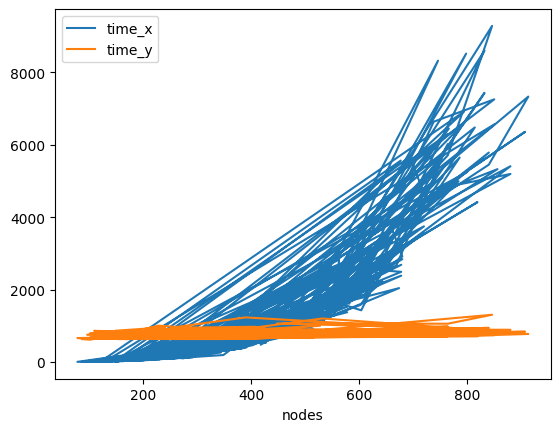

In [109]:
import matplotlib.pyplot as plt
merged[merged['time_x'] < 10000].plot(x="nodes", y=["time_x", "time_y"])
plt.show()

In [3]:
cdf = pd.read_csv("OptimizedGeneralizationOnCodeSearchNetData.csv")
cdf2 = pd.read_csv("AUASTOnCodeSearchNetData.csv")
print(cdf.head())

   name  generalization_nodes  generalization_edges  \
0     0                    35                    35   
1     1                    59                    59   
2    10                    80                    80   
3  1000                    63                    63   
4  1001                    39                    39   

   generalization_node_variables  generalization_edge_variables  g1_nodes  \
0                             11                             22        72   
1                             18                             38       131   
2                             22                             36       137   
3                             17                             31       116   
4                             13                             23       230   

   g1_edges  g2_nodes  g2_edges  time  
0        32       171        75    90  
1        59       124        55   124  
2        64       229       105   189  
3        55       151        68   130  
4     

In [4]:
add_more_info(cdf)

<Axes: ylabel='Density'>

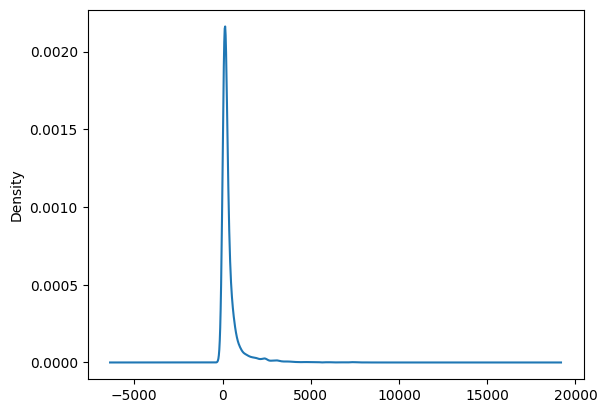

In [5]:
cdf['time'].plot(kind='kde')

<Axes: ylabel='Frequency'>

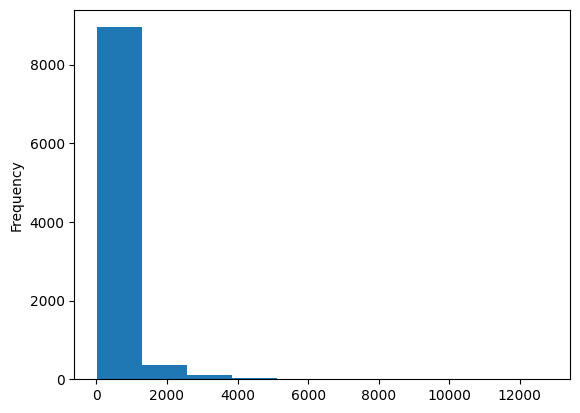

In [6]:
cdf['time'].plot(kind='hist')

<Axes: xlabel='nodes', ylabel='time (ms)'>

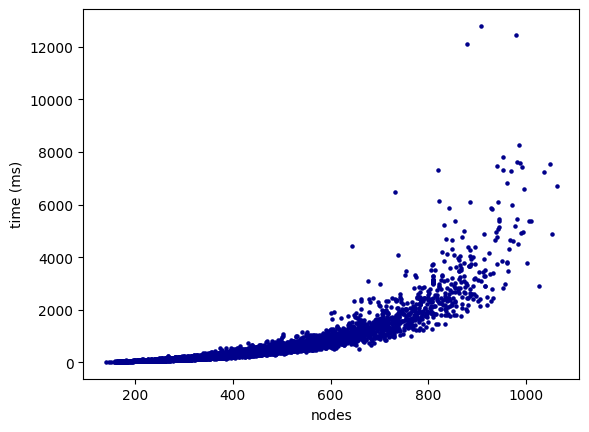

In [7]:
cdf.plot.scatter(x='nodes', y='time', c='DarkBlue', s=5, ylabel='time (ms)')

In [8]:
print('Sum:', cdf['time'].sum(), 'ms =', cdf['time'].sum() / 1000, 's =', cdf['time'].sum() / 60000, 'm')
cdf.describe()['time']

Sum: 3725139 ms = 3725.139 s = 62.08565 m


count     9496.000000
mean       392.285067
std        688.611537
min         17.000000
25%        106.000000
50%        182.000000
75%        374.000000
max      12793.000000
Name: time, dtype: float64

<Axes: xlabel='generalization nodes', ylabel='time (ms)'>

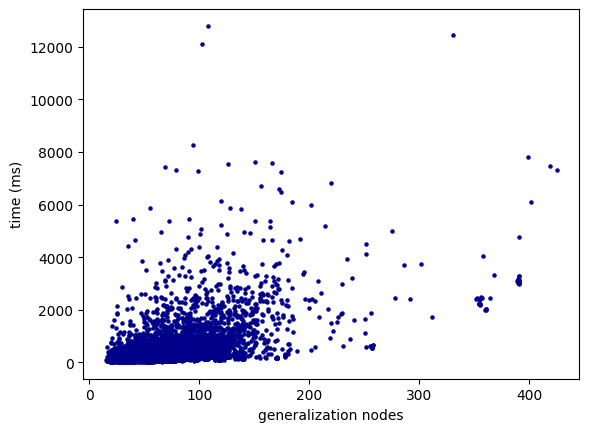

In [9]:
quantile = cdf['time'].quantile(0.95)
cdf.plot.scatter(x='generalization_nodes', y='time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='generalization nodes')

<Axes: xlabel='generalization node variables', ylabel='time (ms)'>

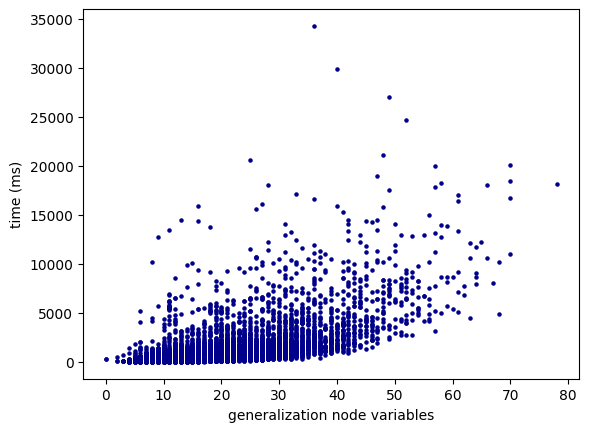

In [104]:
cdf.plot.scatter(x='generalization_node_variables', y='time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='generalization node variables')

<Axes: xlabel='generalization edge variables', ylabel='time (ms)'>

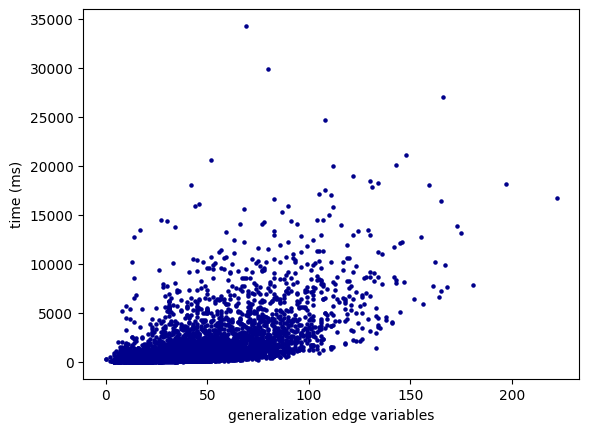

In [103]:
cdf.plot.scatter(x='generalization_edge_variables', y='time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='generalization edge variables')

<Axes: xlabel='edges', ylabel='time'>

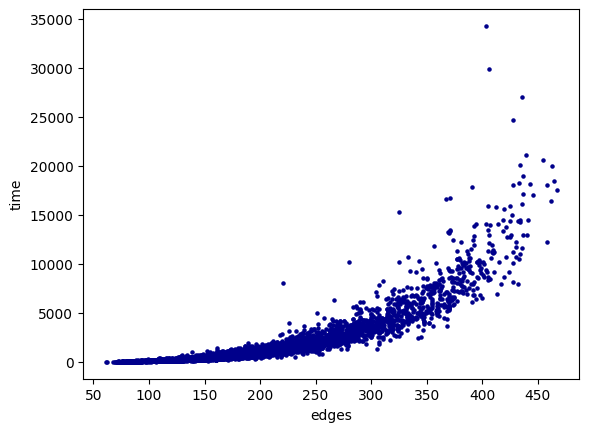

In [74]:
cdf.plot.scatter(x='edges', y='time', c='DarkBlue', s=5)

<Axes: xlabel='nodes^2', ylabel='time (ms)'>

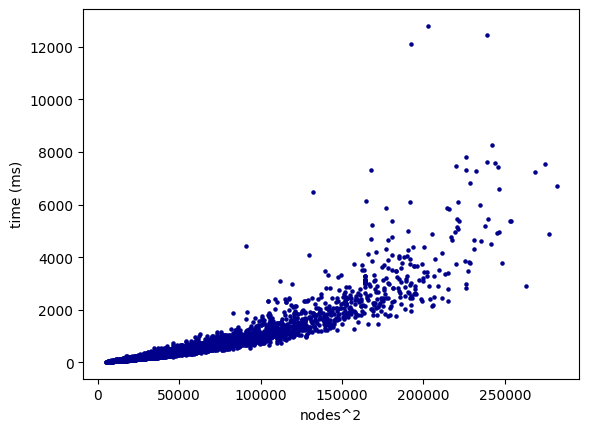

In [10]:
cdf.plot.scatter(x='nodes^2', y='time', c='DarkBlue', s=5, ylabel='time (ms)')

<Axes: xlabel='nodes * edges', ylabel='time (ms)'>

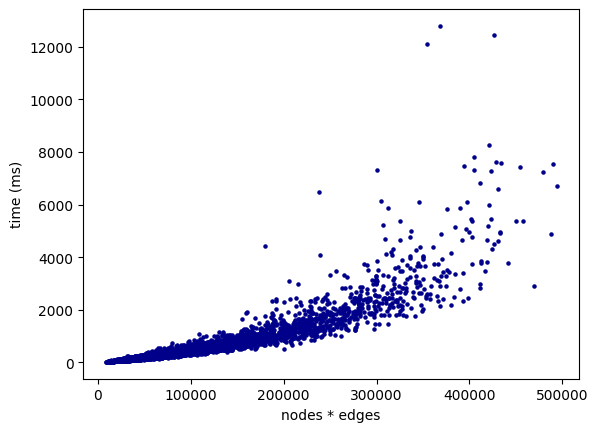

In [11]:
cdf.plot.scatter(x='nodesXedges', y='time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='nodes * edges')

<Axes: xlabel='nodes * edges', ylabel='time (ms)'>

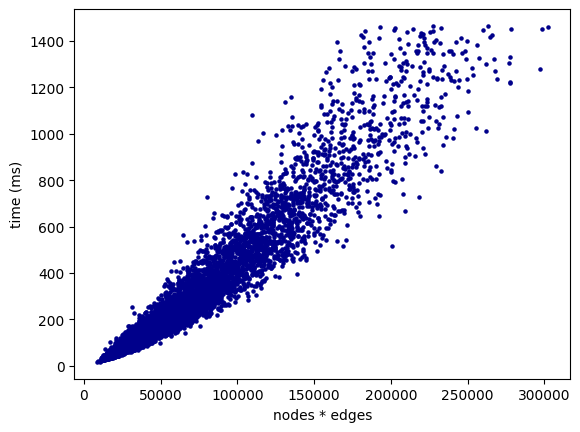

In [12]:
quantile = cdf['time'].quantile(0.95)
cdf[cdf['time'] < quantile].plot.scatter(x='nodesXedges', y='time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='nodes * edges')

<Axes: xlabel='nodes', ylabel='time (ms)'>

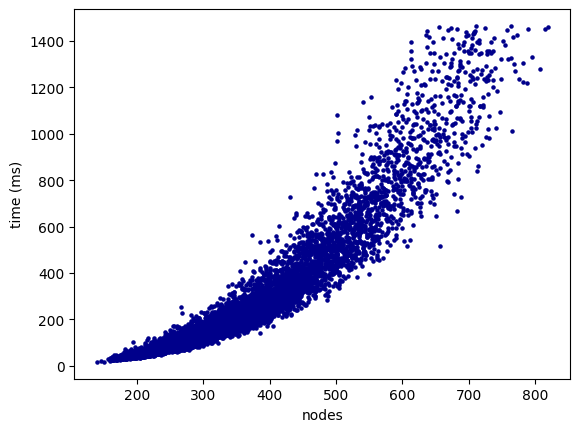

In [13]:
cdf[cdf['time'] < quantile].plot.scatter(x='nodes', y='time', c='DarkBlue', s=5, ylabel='time (ms)')

<Axes: xlabel='nodes^2', ylabel='time (ms)'>

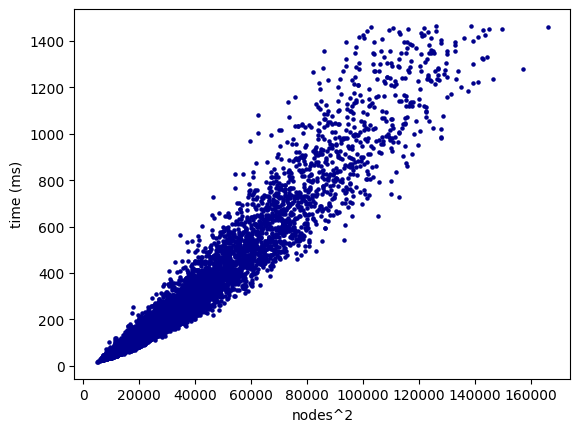

In [14]:
cdf[cdf['time'] < quantile].plot.scatter(x='nodes^2', y='time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='nodes^2')

In [127]:
cdf2.time.describe()

count    9625.000000
mean      780.155429
std       141.525998
min       609.000000
25%       693.000000
50%       738.000000
75%       814.000000
max      2525.000000
Name: time, dtype: float64

In [125]:
cdf2.time.sum() / 1000

7508.996

In [126]:
cdf2.time.sum() / 60000

125.14993333333334

In [128]:
merged = pd.merge(cdf, cdf2, on='name', how='inner')
merged

,name,generalization_nodes,generalization_edges,generalization_node_variables,generalization_edge_variables,g1_nodes,g1_edges,g2_nodes,g2_edges,time_x,nodes,edges,nodes^2,edges^2,nodesXedges,time_y
0,0,35,35,11,22,72,32,171,75,136,243,107,12312,2400,26001,1026
1,1,59,59,18,38,131,59,124,55,210,255,114,16244,3245,29070,702
2,10,80,80,22,36,137,64,229,105,422,366,169,31373,6720,61854,701
3,1000,67,67,17,39,116,55,151,68,198,267,123,17516,3740,32841,766
4,1001,42,42,13,23,230,106,109,46,458,339,152,25070,4876,51528,716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9491,9995,80,80,22,44,164,74,222,102,487,386,176,36408,7548,67936,1050
9492,9996,161,161,40,84,412,182,290,130,3447,702,312,119480,23660,219024,879
9493,9997,62,62,20,37,133,59,149,67,204,282,126,19817,3953,35532,983
9494,9998,70,70,22,39,122,54,245,109,563,367,163,29890,5886,59821,1091


<Axes: xlabel='nodes', ylabel='time (ms)'>

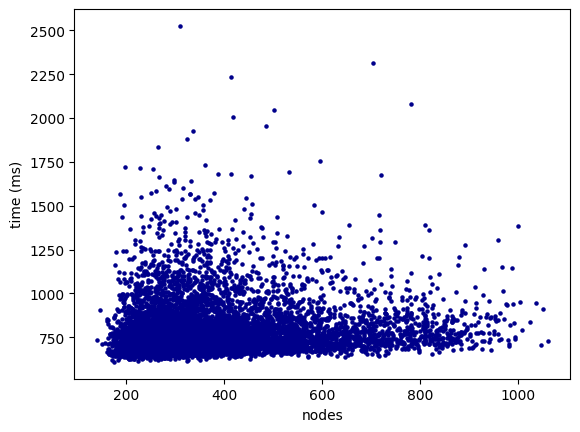

In [129]:
merged.plot.scatter(x='nodes', y='time_y', c='DarkBlue', s=5, ylabel='time (ms)')

<Axes: xlabel='edges', ylabel='time (ms)'>

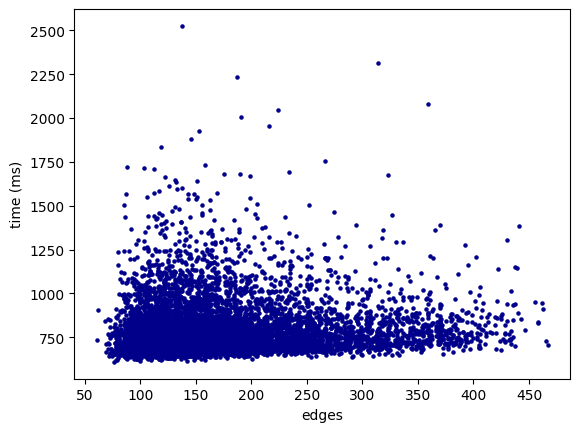

In [130]:
merged.plot.scatter(x='edges', y='time_y', c='DarkBlue', s=5, ylabel='time (ms)')

<Axes: xlabel='nodes^2', ylabel='time (ms)'>

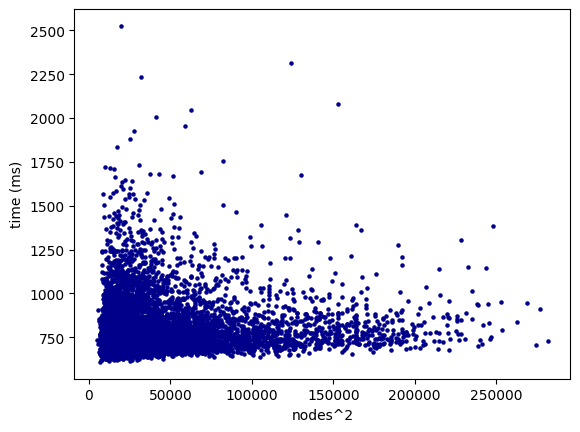

In [131]:
merged.plot.scatter(x='nodes^2', y='time_y', c='DarkBlue', s=5, ylabel='time (ms)')

<Axes: xlabel='nodes', ylabel='time (ms)'>

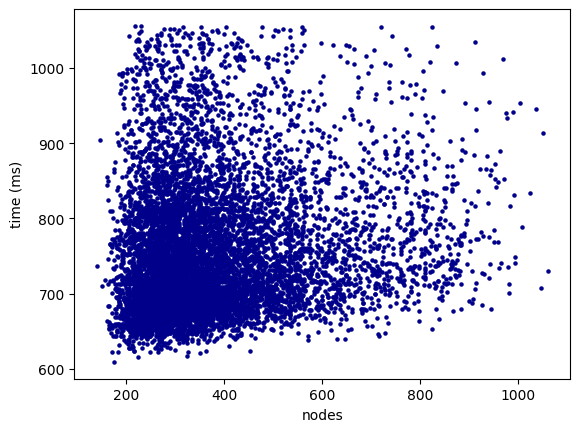

In [132]:
quantile = merged['time_y'].quantile(0.95)
merged[merged['time_y'] < quantile].plot.scatter(x='nodes', y='time_y', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='nodes')

<Axes: xlabel='nodes^2', ylabel='time (ms)'>

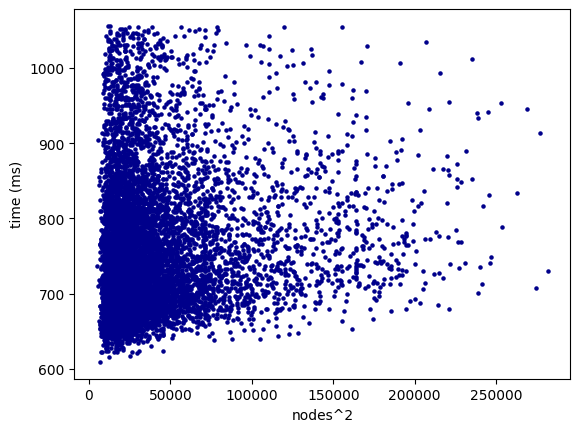

In [133]:
merged[merged['time_y'] < quantile].plot.scatter(x='nodes^2', y='time_y', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='nodes^2')